Global Super Store Dataset
Sahil Wikhe : Project 1 : Data Mining 


Questions:

What are the top-performing product categories and regions in terms of sales and profitability?

How does discounting affect profitability, and is there an optimal discount rate?

What shipping methods are most effective, and do they vary by region?

Are there any noticeable trends in sales performance over time (seasonality, yearly growth)?

In [62]:
import pandas as pd
import numpy as np 


In [63]:
df = pd.read_csv("Global_Superstore2.csv", encoding="latin1")

In [64]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
0,32298,CA-2012-124891,31-07-2012,31-07-2012,Same Day,RH-19495,Rick Hansen,Consumer,New York City,New York,...,TEC-AC-10003033,Technology,Accessories,Plantronics CS510 - Over-the-Head monaural Wir...,2309.650,7,0.0,762.1845,933.57,Critical
1,26341,IN-2013-77878,05-02-2013,07-02-2013,Second Class,JR-16210,Justin Ritter,Corporate,Wollongong,New South Wales,...,FUR-CH-10003950,Furniture,Chairs,"Novimex Executive Leather Armchair, Black",3709.395,9,0.1,-288.7650,923.63,Critical
2,25330,IN-2013-71249,17-10-2013,18-10-2013,First Class,CR-12730,Craig Reiter,Consumer,Brisbane,Queensland,...,TEC-PH-10004664,Technology,Phones,"Nokia Smart Phone, with Caller ID",5175.171,9,0.1,919.9710,915.49,Medium
3,13524,ES-2013-1579342,28-01-2013,30-01-2013,First Class,KM-16375,Katherine Murray,Home Office,Berlin,Berlin,...,TEC-PH-10004583,Technology,Phones,"Motorola Smart Phone, Cordless",2892.510,5,0.1,-96.5400,910.16,Medium
4,47221,SG-2013-4320,05-11-2013,06-11-2013,Same Day,RH-9495,Rick Hansen,Consumer,Dakar,Dakar,...,TEC-SHA-10000501,Technology,Copiers,"Sharp Wireless Fax, High-Speed",2832.960,8,0.0,311.5200,903.04,Critical


In [65]:
df.shape

(51290, 24)

In [66]:
df.isnull().sum()

Row ID                0
Order ID              0
Order Date            0
Ship Date             0
Ship Mode             0
Customer ID           0
Customer Name         0
Segment               0
City                  0
State                 0
Country               0
Postal Code       41296
Market                0
Region                0
Product ID            0
Category              0
Sub-Category          0
Product Name          0
Sales                 0
Quantity              0
Discount              0
Profit                0
Shipping Cost         0
Order Priority        0
dtype: int64

In [67]:
df["City"].dtype

dtype('O')

In [68]:
df = df.dropna(axis=1)

In [69]:
df.shape


(51290, 23)

In [70]:
import matplotlib.pyplot as plt
import seaborn as sns

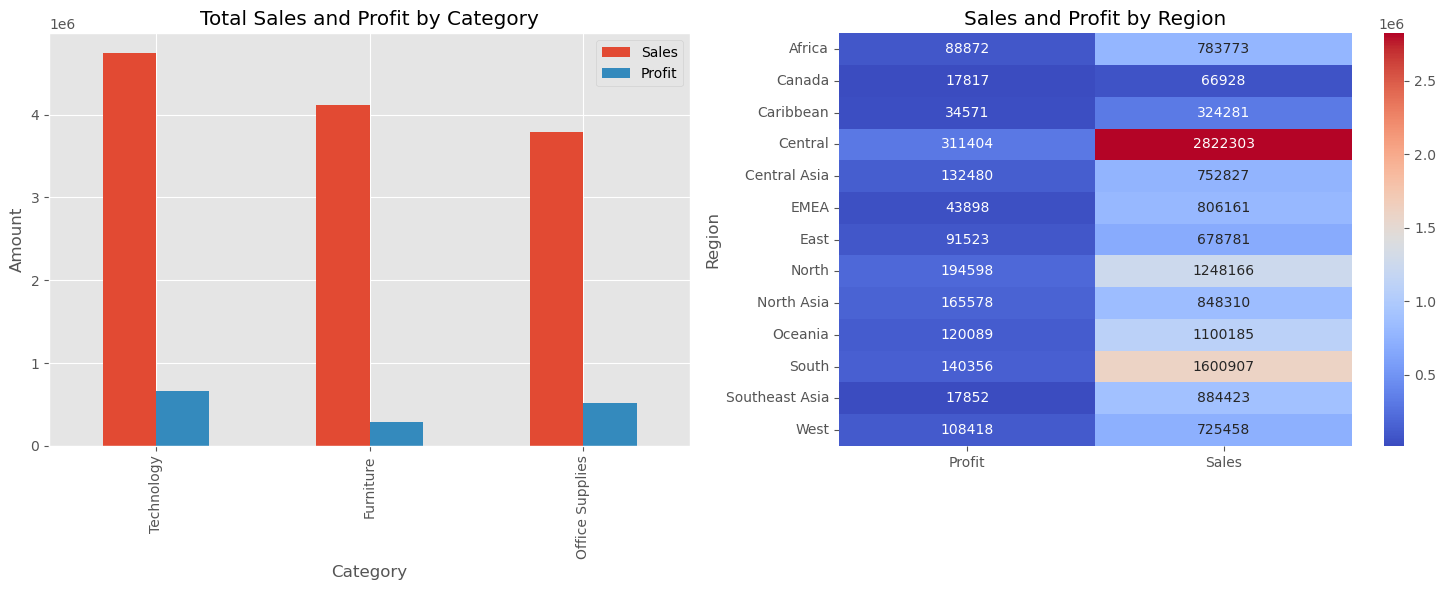

In [71]:
# Set plot style
plt.style.use('ggplot')

# 1. Top-performing product categories and regions
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Sales and Profit by Category
category_sales = df.groupby("Category")[["Sales", "Profit"]].sum().sort_values("Sales", ascending=False)
category_sales.plot(kind="bar", ax=axes[0])
axes[0].set_title("Total Sales and Profit by Category")
axes[0].set_ylabel("Amount")

# Sales and Profit by Region (Heatmap)
region_sales = df.pivot_table(values=["Sales", "Profit"], index="Region", aggfunc="sum")
sns.heatmap(region_sales, annot=True, fmt=".0f", cmap="coolwarm", ax=axes[1])
axes[1].set_title("Sales and Profit by Region")

plt.tight_layout()
plt.show()

/var/folders/vg/ptsw846s1hv0_jff0w2rt3n00000gn/T/ipykernel_70230/3874853392.py:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  discount_profit = df.groupby(pd.cut(df["Discount"], bins=10))["Profit Margin"].mean()


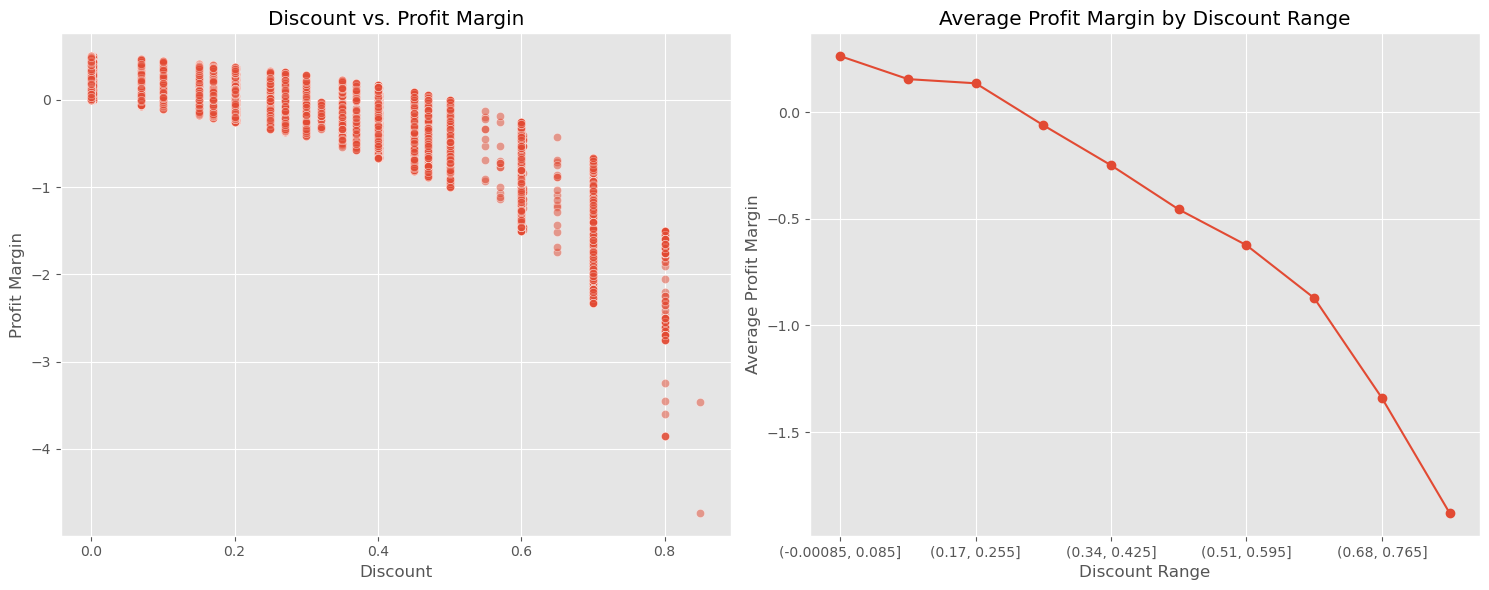

In [72]:
# 2. Effect of discounting on profitability
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Scatter plot: Discount vs Profit Margin
df["Profit Margin"] = df["Profit"] / df["Sales"]
sns.scatterplot(data=df, x="Discount", y="Profit Margin", alpha=0.5, ax=axes[0])
axes[0].set_title("Discount vs. Profit Margin")
axes[0].set_ylabel("Profit Margin")
axes[0].set_xlabel("Discount")

# Line chart: Average profit margin across different discount ranges
discount_profit = df.groupby(pd.cut(df["Discount"], bins=10))["Profit Margin"].mean()
discount_profit.plot(kind="line", marker="o", ax=axes[1])
axes[1].set_title("Average Profit Margin by Discount Range")
axes[1].set_xlabel("Discount Range")
axes[1].set_ylabel("Average Profit Margin")

plt.tight_layout()
plt.show()

/var/folders/vg/ptsw846s1hv0_jff0w2rt3n00000gn/T/ipykernel_70230/933741148.py:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=45)


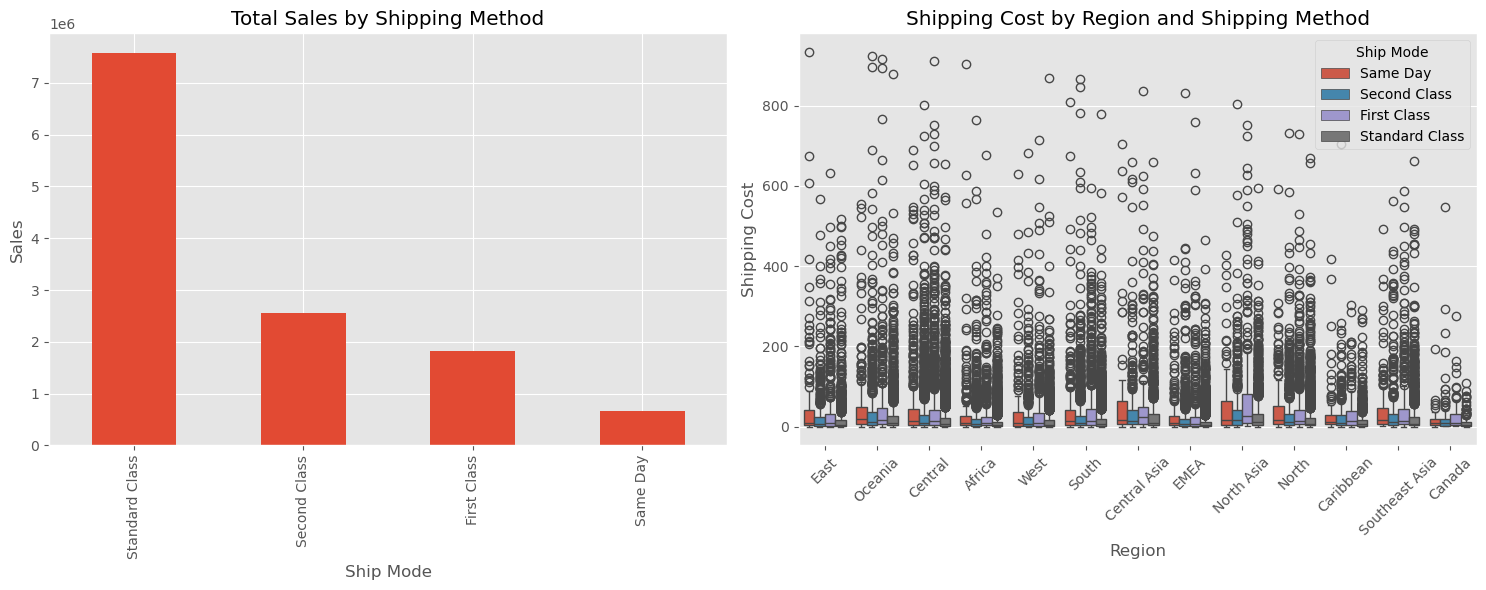

In [73]:
# 3. Shipping methods effectiveness and regional variations
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Sales by Shipping Method
ship_sales = df.groupby("Ship Mode")["Sales"].sum().sort_values(ascending=False)
ship_sales.plot(kind="bar", ax=axes[0])
axes[0].set_title("Total Sales by Shipping Method")
axes[0].set_ylabel("Sales")

# Shipping Cost by Region and Shipping Method (Box plot)
sns.boxplot(data=df, x="Region", y="Shipping Cost", hue="Ship Mode", ax=axes[1])
axes[1].set_title("Shipping Cost by Region and Shipping Method")
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=45)

plt.tight_layout()
plt.show()

/var/folders/vg/ptsw846s1hv0_jff0w2rt3n00000gn/T/ipykernel_70230/4000683038.py:2: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df["Order Date"] = pd.to_datetime(df["Order Date"], errors='coerce')


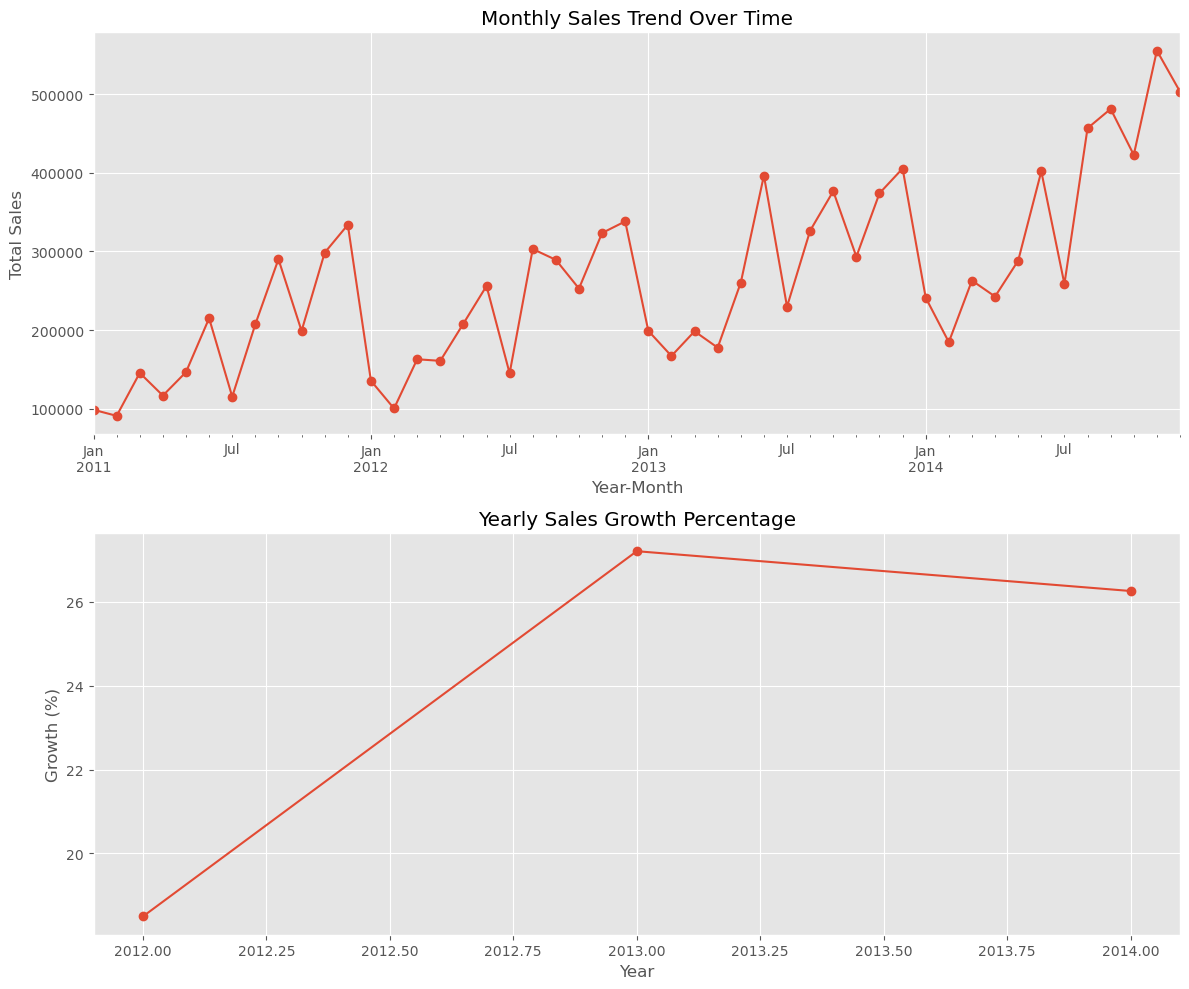

In [75]:
# Check the data type of "Order Date" to confirm it's in datetime format
df["Order Date"] = pd.to_datetime(df["Order Date"], errors='coerce')

# Re-attempt the sales trends analysis
import matplotlib.pyplot as plt

fig, axes = plt.subplots(2, 1, figsize=(12, 10))

# Monthly Sales Trends
df["Year-Month"] = df["Order Date"].dt.to_period("M")
monthly_sales = df.groupby("Year-Month")["Sales"].sum()
monthly_sales.plot(kind="line", marker="o", ax=axes[0])
axes[0].set_title("Monthly Sales Trend Over Time")
axes[0].set_xlabel("Year-Month")
axes[0].set_ylabel("Total Sales")

# Yearly Growth Percentage
df["Year"] = df["Order Date"].dt.year
yearly_sales = df.groupby("Year")["Sales"].sum()
yearly_growth = yearly_sales.pct_change() * 100
yearly_growth.plot(kind="line", marker="o", ax=axes[1])
axes[1].set_title("Yearly Sales Growth Percentage")
axes[1].set_xlabel("Year")
axes[1].set_ylabel("Growth (%)")

plt.tight_layout()
plt.show()
